In [ ]:
https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Airline = pd.read_csv('airlines.csv', header=0,  index_col=0)
Airline

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1
2,US,1558,PHX,CLT,3,15,222,1
3,AA,2400,LAX,DFW,3,20,165,1
4,AA,2466,SFO,DFW,3,20,195,1
5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539379,CO,178,OGG,SNA,5,1439,326,0
539380,FL,398,SEA,ATL,5,1439,305,0
539381,FL,609,SFO,MKE,5,1439,255,0


In [3]:
X_cat = Airline[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
X_num = Airline.drop(['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay'], axis=1)
X_num

,Flight,Time,Length
id,,,
1,269,15,205
2,1558,15,222
3,2400,20,165
4,2466,20,195
5,108,30,202
...,...,...,...
539379,178,1439,326
539380,398,1439,305
539381,609,1439,255


In [4]:
X_cat

,Airline,AirportFrom,AirportTo,DayOfWeek
id,,,,
1,CO,SFO,IAH,3
2,US,PHX,CLT,3
3,AA,LAX,DFW,3
4,AA,SFO,DFW,3
5,AS,ANC,SEA,3
...,...,...,...,...
539379,CO,OGG,SNA,5
539380,FL,SEA,ATL,5
539381,FL,SFO,MKE,5


In [5]:
# Catagorize all the non number data (AKA Weekdays, Flight locations, and Airline)
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
id,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539379,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539381,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Scale just the number data of the X-axis and add it to the catagorized dataframe as is.
# Make it your new X-axis with the Y-axis being delayed or not
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = Airline['Delay']
X.head()

,Flight,Time,Length,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
id,,,,,,,,,,,,,,,,,,,,,
1,-1.044258,-2.833092,1.038237,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.420778,-2.833092,1.280689,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.013509,-2.815110,0.467761,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.018415,-2.815110,0.895618,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.122133,-2.779144,0.995451,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [9]:
classifier.fit(X_train, y_train)

C:\Users\Connor\anaconda3\envs\PythonData38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6444503222202171
Testing Data Score: 0.6444462572119306


In [11]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
randomForestClass = RandomForestClassifier(random_state=42)
randomForestClass.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
 print("RandomForestClassifier score: ", randomForestClass.score(X_test,y_test))

RandomForestClassifier score:  0.6190543286415615


In [15]:
# Create a RandomForestClassifier model, fit it to the data, and print the model's score.
randomForestClass_scaled = RandomForestClassifier(random_state=0)
randomForestClass_scaled.fit(X_train_scaled, y_train)
print("RandomForestClassifier scaled score: ", randomForestClass_scaled.score(X_test_scaled, y_test))

RandomForestClassifier scaled score:  0.6193138839861768


In [16]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy.stats import randint
from sklearn import metrics

In [17]:
Airline.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

<AxesSubplot:>

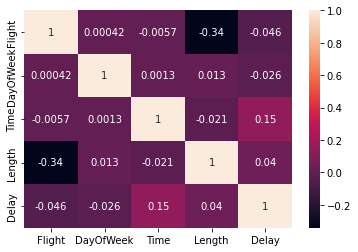

In [18]:
sns.heatmap(Airline.corr(), annot=True)

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

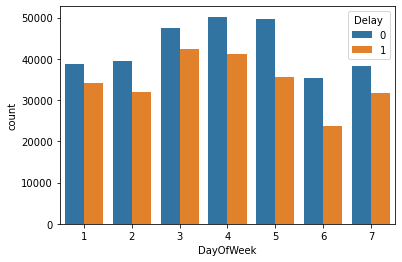

In [19]:
sns.countplot(data=Airline, x='DayOfWeek', hue='Delay')

In [20]:
# Size for images
mpl.rcParams['figure.figsize'] = (17,10)
mpl.rcParams['font.size'] = 20

In [21]:
Airline = pd.read_csv('airlines.csv', header=0,  index_col=1)
Airline.head()

,id,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
Airline,,,,,,,,
CO,1,269,SFO,IAH,3,15,205,1
US,2,1558,PHX,CLT,3,15,222,1
AA,3,2400,LAX,DFW,3,20,165,1
AA,4,2466,SFO,DFW,3,20,195,1
AS,5,108,ANC,SEA,3,30,202,0


In [22]:
# Delete id column
Airline = Airline.drop(columns = ['id'])
Airline.head()

,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
Airline,,,,,,,
CO,269,SFO,IAH,3,15,205,1
US,1558,PHX,CLT,3,15,222,1
AA,2400,LAX,DFW,3,20,165,1
AA,2466,SFO,DFW,3,20,195,1
AS,108,ANC,SEA,3,30,202,0


In [23]:
# Bring only the nuemric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_column_names = Airline.select_dtypes(include=numerics).columns
print(numeric_column_names, '\n')

# Bring only the object columns (strings)
objects = 'object'
object_column_names = Airline.select_dtypes(include=objects).columns
print(object_column_names, '\n')

Index(['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay'], dtype='object') 

Index(['AirportFrom', 'AirportTo'], dtype='object') 



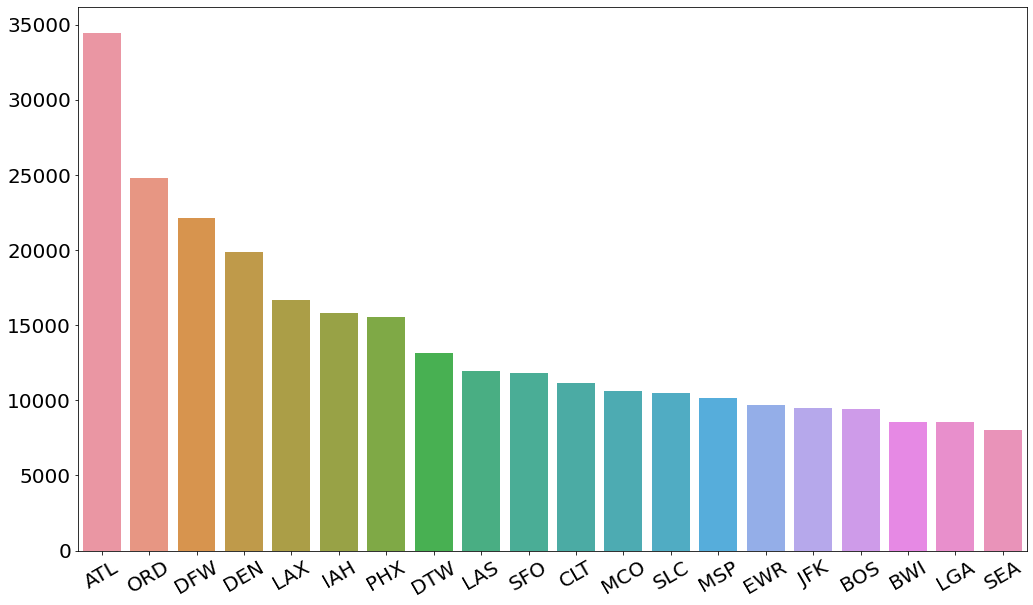

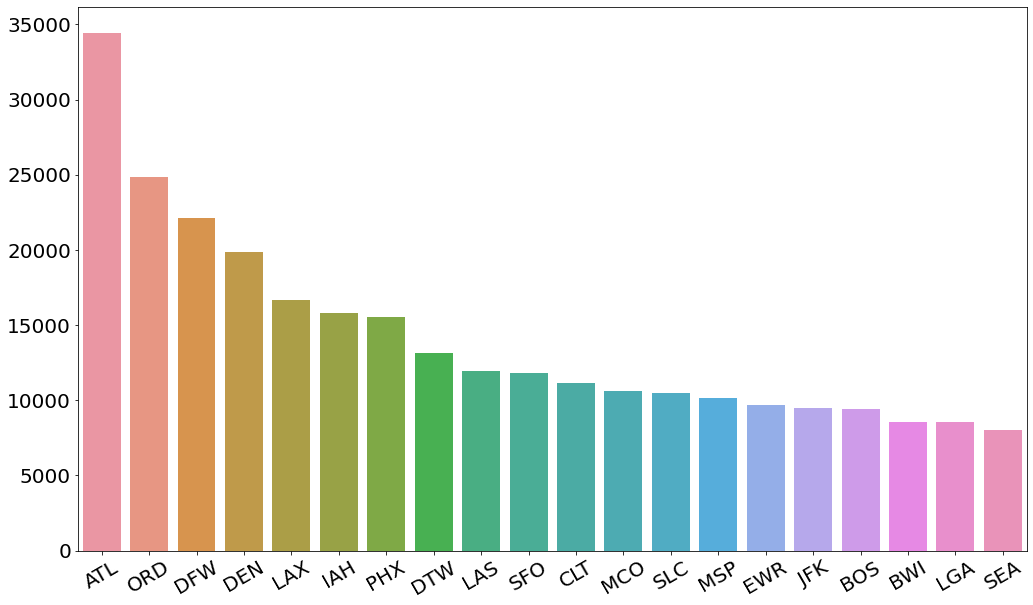

In [24]:
for column in object_column_names:
    value_counts_column =  Airline[column].value_counts()
    if value_counts_column.shape[0] > 20:
        value_counts_column = value_counts_column.sort_values(ascending = False)
        value_counts_column = value_counts_column[:20]
    ax = sns.barplot(y=value_counts_column.values, x=value_counts_column.index)
    ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    plt.show()